In [3]:
import sys
sys.path.append("../")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mempred import *

ver()

This is mempred version 2.2: Fienchen
Latest feature: upgrade predictor


### Butane Dihedral Angle

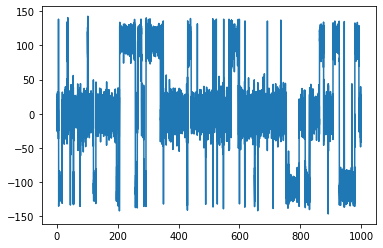

In [4]:
from numba import njit
@njit 
def convert_dihedral(x):
    x_new = x.copy()
    """Corrects the computed dihedral trajectory for negative values and shifts to the 180 deg state"""
    for i in range(len(x)):
        if x_new[i] <= 0.0:
            
            x_new[i] += 360 

        x_new[i] -= 180  # will shift trans state to 0 deg
        
    return x_new

trj=np.loadtxt("example.trj")

x = convert_dihedral(trj[:,1])
t = trj[:,0]

plt.plot(t,x)

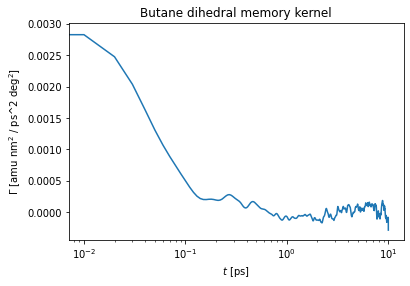

In [5]:
from numba import njit



predict=GLEPrediction(bins=100,  cut = len(trj) ,trunc=1000, dt = 0.01,physical=True, no_fe=False, plot_pred = True,kde_mode=False)
kernel = predict.extractKernel([x],time=t,fit_kernel = False,kT=2.494,G_method=True)

plt.plot(kernel[1],kernel[2])
plt.xscale('log')
plt.title("Butane dihedral memory kernel")
plt.xscale("log")
plt.xlabel("$t$ [ps]")
plt.ylabel("$\\Gamma$ [amu nm$^2$ / ps^2 deg$^2$]")
plt.show()

### Weather Berlin

<AxesSubplot:>

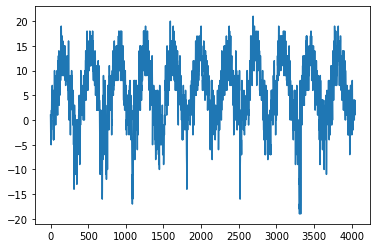

In [6]:
data = pd.read_csv('berlin.csv')
data.head()
data['DewPointC'].plot()



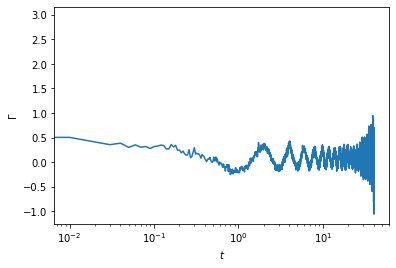

In [7]:
predict=GLEPrediction(bins=100,  cut = len(trj) ,trunc=1000, dt = 0.01,physical=True, no_fe=False, plot_pred = True,kde_mode=True)
kernel = predict.extractKernel([data['DewPointC'].values],fit_kernel = False,kT=2.494,G_method=False)

plt.plot(kernel[1],kernel[2])
plt.xscale('log')
plt.xscale("log")
plt.xlabel("$t$ ")
plt.ylabel("$\\Gamma$")
plt.show()